# CloudSat

CloudSat products can be downloaded by using the ``download`` method of the corresponding product object. For this example we will have a look a the radar reflectivity contained in the 2B-GEOPROF product.

In [1]:
%load_ext autoreload
%autoreload 2
from datetime import datetime
from pansat.products.satellite.cloud_sat import l2b_geoprof
t_0 = datetime(2016, 11, 21, 10)
t_1 = datetime(2016, 11, 21, 12)
files = l2b_geoprof.download(t_0, t_1)

PARSING IDENTITIES: {'pansat': ['Ar-atimTP4LxeKWxpGXTME6dABgDPLgHy8YPD2p0fGA=', 'tE77dMSIJ6yWiCKa-Slkjw=='], 'Icare': ['gAAAAABffI84YlN0MD5ujLn4pSmNiz3wdoEjwvTJZfuhR5DEliUXGsaNzBQOXpS-ZvbmrnY5aPbgX79COoDSsvoNuDKiryemWQ==', 'gAAAAABffI845jrhTLEx4bMe2dUXMhyFPYmGwWmjn8SbFwdS0DdrJ50qb2UCN7Hs4cghhhoiG6-hNHgepPQeNB320DqgfluJVg=='], 'Copernicus': ['gAAAAABfhaGc8wVUcXm2zBhgS0fKSzFxFpfaiSnMkDA33fpssRmDvdqwJh1Hyi2yhvt9nSypUfupAOB4bKe8gab2kyUNDpHZPKH9158tXWpnoEUfd_e-5HlLXRzgsJTYaDeWXYvw8UCs', 'gAAAAABfhaGcXvxf66ZWh9g1DAg4c2pwP-5VOlNfNSUS4Alue0GxCxytU8kI2azCp0pZTZ6LzSParRl65yQfCmgvr7bEq0dVXxthP49-Sj0p-WnxuDMgzP1scvL7aXC9mZgKWeXfjAUI']} /home/simon/.config/pansat/identities.json


The variable ``files`` now contains the downloaded files. Now we only need to decipher the data format and extract the data of interest.

In [2]:
import numpy as np
import numpy.ma as ma
from pansat.formats.hdf4 import HDF4File

file = HDF4File(files[0])
z = file.Radar_Reflectivity[:]

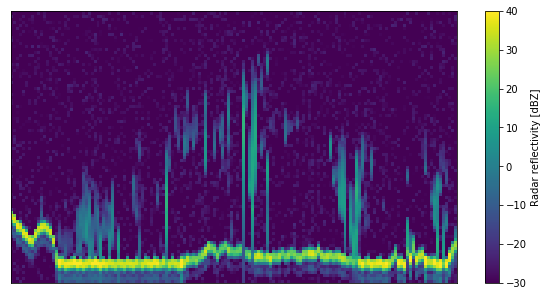

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

z_scaled = z / 100.0
z_scaled = np.maximum(z_scaled, -30)
z_scaled = np.minimum(z_scaled, 40)

plt.figure(figsize=(10, 5))
plt.pcolormesh(z_scaled[10000:25000:100, 110:20:-1].T)
plt.colorbar(label="Radar reflectivity [dBZ]")
plt.xticks([])
plt.yticks([]);